In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
import json
import scipy.stats as stats

In [4]:
#creating data frame
chi_data=pd.read_csv('Chicago/Chicago_moonphase.csv')
chi_frame=chi_data.drop(['Unnamed: 0','Unnamed: 0.1','Moon Phase_x','Crime Count','Special','Special Type'], axis=1)
chicago = chi_frame.rename(columns={'Moon Phase_y':'Moon Phase','Violent Crime':'Violent_Crime','NonViolent Crime':'NonViolent_Crime','Total Crime':'Total_Crime'})
chicago.head(2)

,Date,Violent_Crime,NonViolent_Crime,Total_Crime,Moon Phase
0,1/1/15,634.0,567.0,1201.0,NaN
1,1/2/15,267.0,406.0,673.0,NaN


In [5]:
#sorting by named moon phases
abbr_chi=chicago.dropna()
abbr_chi.head(2)

,Date,Violent_Crime,NonViolent_Crime,Total_Crime,Moon Phase
3,1/4/15,221.0,292.0,513.0,Full Moon
12,1/13/15,227.0,384.0,611.0,Third Quarter


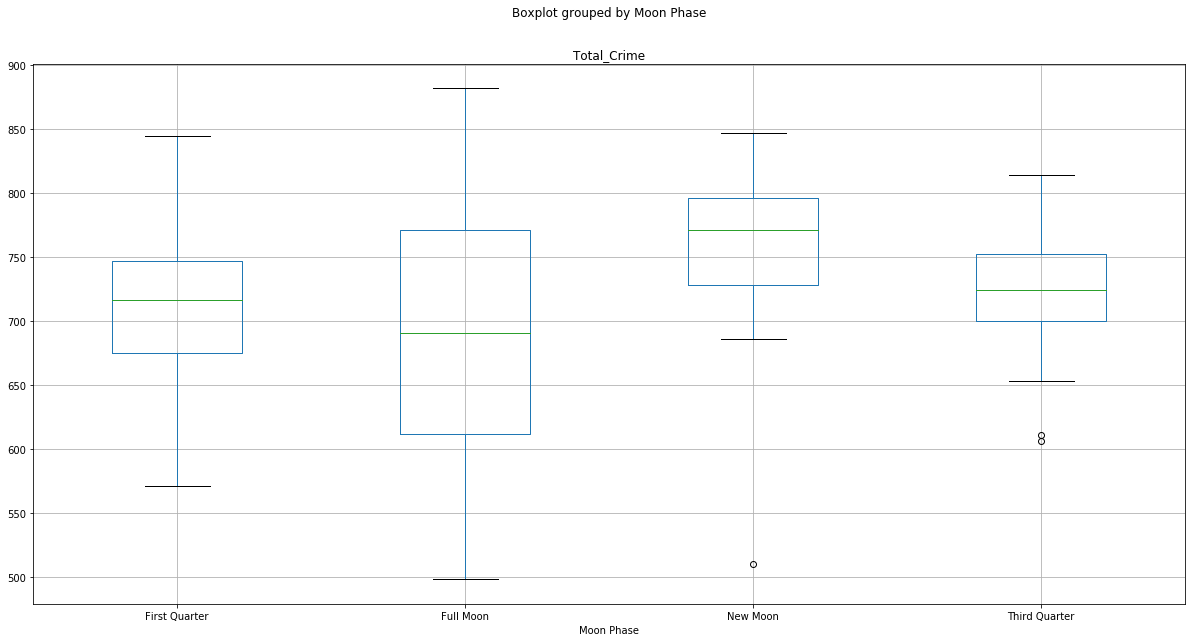

In [7]:
#creating total crimes boxplot
abbr_chi.boxplot("Total_Crime", by="Moon Phase", figsize=(20, 10))

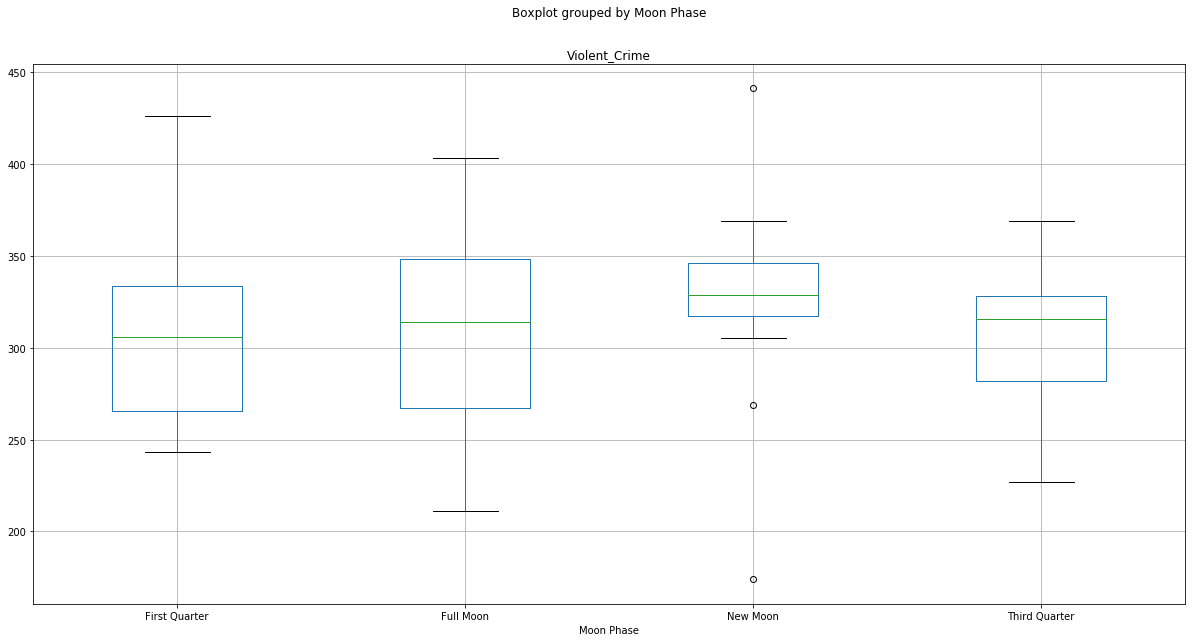

In [46]:
#creating violent crime boxplots
abbr_chi.boxplot("Violent_Crime", by="Moon Phase", figsize=(20, 10))

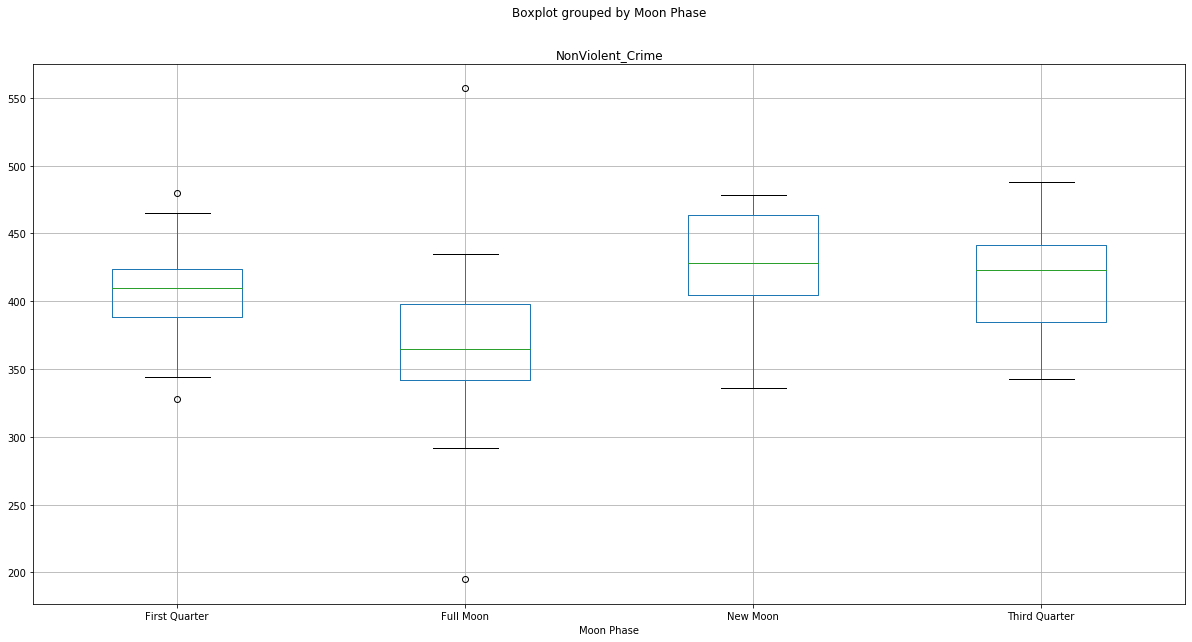

In [8]:
#creating non-violent crime data
abbr_chi.boxplot("NonViolent_Crime", by="Moon Phase", figsize=(20, 10))

In [10]:
#total crime anova test
group1 = abbr_chi[abbr_chi['Moon Phase'] == "First Quarter"]["Total_Crime"]
group2 = abbr_chi[abbr_chi['Moon Phase'] == "Full Moon"]["Total_Crime"]
group3 = abbr_chi[abbr_chi['Moon Phase'] == "New Moon"]["Total_Crime"]
group4 = abbr_chi[abbr_chi['Moon Phase'] == "Third Quarter"]["Total_Crime"]

stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=1.2692223121953574, pvalue=0.29632734855816767)

In [45]:
#violent crime anova test
group1 = abbr_chi[abbr_chi['Moon Phase'] == "First Quarter"]["Violent_Crime"]
group2 = abbr_chi[abbr_chi['Moon Phase'] == "Full Moon"]["Violent_Crime"]
group3 = abbr_chi[abbr_chi['Moon Phase'] == "New Moon"]["Violent_Crime"]
group4 = abbr_chi[abbr_chi['Moon Phase'] == "Third Quarter"]["Violent_Crime"]
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=0.2987706031709153, pvalue=0.8260897448348143)

In [11]:
#non-violent crime anova test
group1 = abbr_chi[abbr_chi['Moon Phase'] == "First Quarter"]["NonViolent_Crime"]
group2 = abbr_chi[abbr_chi['Moon Phase'] == "Full Moon"]["NonViolent_Crime"]
group3 = abbr_chi[abbr_chi['Moon Phase'] == "New Moon"]["NonViolent_Crime"]
group4 = abbr_chi[abbr_chi['Moon Phase'] == "Third Quarter"]["NonViolent_Crime"]
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=2.4711040789508973, pvalue=0.0739332076249511)